## Trabajo de Análisis de Datos UDD:




Alumnos:

| Alumno | Email |
|--------|-------|
|Carola Hoffmann | choffmann@udd.cl |
|Wilder Prado     | wilderhp@gmail.com |
|Effry Vigorena   | effryvg@gmail.com |
|Felipe Guzmán    | felipeguzmanv@gmail.com|

## ANALISIS VITAMINA D PRE Y DURANTE PANDEMIA EN PACIENTES SANOS SOBRE MUESTRAS REALIZADAS ENTRE 2018 Y 2021 DESDE ARICA A PUERTO MONTT.

## 1. Introducción

### La vitamina D es un importante regulador del equilibrio del calcio. Además, tiene efectos importantes sobre el sistema inmunitario, induce péptidos antimicrobianos en las superficies mucosas y estudios observacionales anteriores a la pandemia habían encontrado una asociación entre los niveles bajos de este nutriente y un mayor riesgo de infecciones del tracto respiratorio.
### Con las medidas de restricción a la circulación que rigieron durante todo 2020 más parte de 2021, y la imposibilidad de las personas de pasar tiempo al aire libre, los valores de vitamina D eran deficientes en la mayoría de la población.

### En este trabajo se analizará cómo las variables externas ambientales e internas del paciente inciden en la concentración de Vitamina D. 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
import plotly
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from matplotlib import docstring, rcParams

import warnings
warnings.filterwarnings('ignore')

#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv", sep=';', decimal=',')
#data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')
#datahttps://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv

### 2.- Tratamiento de los datos

In [2]:
data.columns = data.columns.str.upper()
data.head(5)

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO ADULTO_NIÑO  \
0  02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M        Niño   
1  02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F      Adulto   
2  02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M      Adulto   
3  02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F      Adulto   
4  02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F      Adulto   

  MACROZONA ESTACIONES_AÑO  EDAD  VITAMINA D  FOSFORO  CALCIO  CREATININA  \
0    CENTRO         VERANO    16       22.87      5.5    10.9        0.90   
1    CENTRO         VERANO    33       15.04      NaN     NaN         NaN   
2    CENTRO         VERANO    45       17.17      4.1     9.6        0.80   
3    CENTRO         VERANO    52       14.44      4.3     9.6        0.60   
4     NORTE         VERANO    52       15.52      NaN     NaN        0.66   

   COVID-19  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [3]:
data = data.rename(columns={'VITAMINA D' : 'VITAMINA_D'})

In [4]:
data['VITAMINA_D'] = data['VITAMINA_D'].astype(float)

In [5]:
# Para definir los resultados de la vitamina en base a la tabla en https://tucuerpomehabla.com/la-vitamina-d-clave-en-nuestro-bienestar/
def condicion(x):
    x=int(x)
    if x<2020:
        return "Pre_covid"
    else:
        return "covid"
    

#def retornarMes(x):
    #return mesesDic[str(x)]


#data['RESULTADO_VAL']= 1

data['estado_covid'] = data['AÑO'].apply(condicion)
data


FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
1        02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
4        02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F   
...                  ...   ...         ...       ...           ...  ...   
212521  31/12/2021 12:20  2021    SANTIAGO   6583559      1,11E+13    F   
212522  31/12/2021 12:35  2021    SANTIAGO   6583737      1,18E+12    F   
212523  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   
212524  31/12/2021 13:17  2021    SANTIAGO   6584013      1,11E+13    F   
212525  31/12/2021 13:55  2021    SANTIAGO   6584165      1,18E+12    F   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  VITAMINA_D  FOSFORO  \
0             Niño    CENTRO         VERANO    16       22.87      5.5   
1           Adulto    CENTRO         VERANO    33       15.04      NaN   
2           Adulto    CENTRO         VERANO    45       17.17      4.1   
3           Adulto    CENTRO         VERANO    52       14.44      4.3   
4           Adulto     NORTE         VERANO    52       15.52      NaN   
...            ...       ...            ...   ...         ...      ...   
212521      Adulto    CENTRO      PRIMAVERA    41        6.62      NaN   
212522      Adulto    CENTRO      PRIMAVERA    63       14.53      NaN   
212523        Niño    CENTRO      PRIMAVERA     1        6.61      5.9   
212524      Adulto    CENTRO      PRIMAVERA    45       18.50      NaN   
212525      Adulto    CENTRO      PRIMAVERA    64       16.91      NaN   

        CALCIO  CREATININA  COVID-19 estado_covid  
0         10.9        0.90       NaN    Pre_covid  
1          NaN         NaN       NaN    Pre_covid  
2          9.6        0.80       NaN    Pre_covid  
3          9.6        0.60       NaN    Pre_covid  
4          NaN        0.66       NaN    Pre_covid  
...        ...         ...       ...          ...  
212521     NaN         NaN       NaN        covid  
212522     NaN         NaN       NaN        covid  
212523     9.7        0.31       NaN        covid  
212524     NaN         NaN       NaN        covid  
212525     NaN        0.90       NaN        covid  

[212526 rows x 16 columns]

###  **Unidad de análisis:**
Primero revisamos cuál es la unidad de análisis. Cada Petición corresponde a un exámen tomado a un paciente X.

In [6]:
data['IDENTIFICADOR'].value_counts()

1,12E+13            92977
1,11E+13            59086
1,19E+12            10702
1,17E+12            10110
1,18E+12             9585
                    ...  
11EX135475396417        1
11EX235222393732        1
11EX235522395944        1
11EX235567397551        1
11EX235439395485        1
Name: IDENTIFICADOR, Length: 391, dtype: int64

In [7]:
data['PETICION'].value_counts()

2208168    1
3645272    1
5029692    1
2588484    1
3632966    1
          ..
3808789    1
2754070    1
2260505    1
4347420    1
4313929    1
Name: PETICION, Length: 212526, dtype: int64

In [8]:
data['LABORATORIO'].unique()

array([' SANTIAGO', ' LA SERENA', ' VALDIVIA', ' ANTOFAGASTA',
       ' PUERTO MONTT', ' ILLAPEL', ' RANCAGUA', ' CONCEPCION', ' OVALLE',
       ' LOS ANDES', ' VIÑA DEL MAR', ' VALLENAR', ' TEMUCO', ' COPIAPO',
       ' ARICA', ' CALAMA', ' IQUIQUE', 'TALCA'], dtype=object)

#### Las variables categóricas también son útiles para predecir resultados, por este motivo se hará un mapeo de las variables que se consideran relevantes para el modelo.
#### La variable que se quiere predecir es el resultado de un examen bajo ciertas condiciones externas a las que se enfrentan los pacientes y que influyen en la concentración de Vitamina D

In [9]:

data['rango_edad'] = data['ADULTO_NIÑO'].map({'Adulto': 1, 'Niño': 0})
data['estación'] = data['ESTACIONES_AÑO'].map({'INVIERNO': 0, 'OTOÑO': 1, 'PRIMAVERA': 2, 'VERANO': 3  })
data['region_lab']= data['LABORATORIO'].map({
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
})

In [10]:
# Se eliminan concentraciones de Vitamina D mayores 120 por tener un comportamiento atípico producto de algún tratamiento clínico
data=data[data['VITAMINA_D']<=120]

In [11]:
# Se agrega la variable "estado_covid2" que representa los periodo de precovid con el estado:0 los años 2018 al 2019 y 
# con estado:1 los años 2010 y 2021
data['estado_covid2']= data['estado_covid'].map({'Pre_covid': 0, 'covid': 1})
data.head()

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO ADULTO_NIÑO  \
0  02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M        Niño   
1  02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F      Adulto   
2  02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M      Adulto   
3  02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F      Adulto   
4  02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F      Adulto   

  MACROZONA ESTACIONES_AÑO  EDAD  VITAMINA_D  FOSFORO  CALCIO  CREATININA  \
0    CENTRO         VERANO    16       22.87      5.5    10.9        0.90   
1    CENTRO         VERANO    33       15.04      NaN     NaN         NaN   
2    CENTRO         VERANO    45       17.17      4.1     9.6        0.80   
3    CENTRO         VERANO    52       14.44      4.3     9.6        0.60   
4     NORTE         VERANO    52       15.52      NaN     NaN        0.66   

   COVID-19 estado_covid  rango_edad  estación  region_lab  estado_covid2  
0       NaN    Pre_covid           0         3          13              0  
1       NaN    Pre_covid           1         3          13              0  
2       NaN    Pre_covid           1         3          13              0  
3       NaN    Pre_covid           1         3          13              0  
4       NaN    Pre_covid           1         3           4              0

####  Se crearon nuevas variables numéricas denominadas: rango_edad, estación, macro_zona, region_lab y estado_covid2. Todas estas variables se consiedaran relevantes puesto que la mayoría de los estudios científicos avalan que la exposicón al sol es relevante en los indicadores de Vitamina D.

In [12]:
data

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
1        02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
4        02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F   
...                  ...   ...         ...       ...           ...  ...   
212521  31/12/2021 12:20  2021    SANTIAGO   6583559      1,11E+13    F   
212522  31/12/2021 12:35  2021    SANTIAGO   6583737      1,18E+12    F   
212523  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   
212524  31/12/2021 13:17  2021    SANTIAGO   6584013      1,11E+13    F   
212525  31/12/2021 13:55  2021    SANTIAGO   6584165      1,18E+12    F   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  VITAMINA_D  FOSFORO  \
0             Niño    CENTRO         VERANO    16       22.87      5.5   
1           Adulto    CENTRO         VERANO    33       15.04      NaN   
2           Adulto    CENTRO         VERANO    45       17.17      4.1   
3           Adulto    CENTRO         VERANO    52       14.44      4.3   
4           Adulto     NORTE         VERANO    52       15.52      NaN   
...            ...       ...            ...   ...         ...      ...   
212521      Adulto    CENTRO      PRIMAVERA    41        6.62      NaN   
212522      Adulto    CENTRO      PRIMAVERA    63       14.53      NaN   
212523        Niño    CENTRO      PRIMAVERA     1        6.61      5.9   
212524      Adulto    CENTRO      PRIMAVERA    45       18.50      NaN   
212525      Adulto    CENTRO      PRIMAVERA    64       16.91      NaN   

        CALCIO  CREATININA  COVID-19 estado_covid  rango_edad  estación  \
0         10.9        0.90       NaN    Pre_covid           0         3   
1          NaN         NaN       NaN    Pre_covid           1         3   
2          9.6        0.80       NaN    Pre_covid           1         3   
3          9.6        0.60       NaN    Pre_covid           1         3   
4          NaN        0.66       NaN    Pre_covid           1         3   
...        ...         ...       ...          ...         ...       ...   
212521     NaN         NaN       NaN        covid           1         2   
212522     NaN         NaN       NaN        covid           1         2   
212523     9.7        0.31       NaN        covid           0         2   
212524     NaN         NaN       NaN        covid           1         2   
212525     NaN        0.90       NaN        covid           1         2   

        region_lab  estado_covid2  
0               13              0  
1               13              0  
2               13              0  
3               13              0  
4                4              0  
...            ...            ...  
212521          13              1  
212522          13              1  
212523          13              1  
212524          13              1  
212525          13              1  

[212462 rows x 20 columns]

In [13]:
data.columns

Index(['FECHA_PETICION', 'AÑO', 'LABORATORIO', 'PETICION', 'IDENTIFICADOR',
       'SEXO', 'ADULTO_NIÑO', 'MACROZONA', 'ESTACIONES_AÑO', 'EDAD',
       'VITAMINA_D', 'FOSFORO', 'CALCIO', 'CREATININA', 'COVID-19',
       'estado_covid', 'rango_edad', 'estación', 'region_lab',
       'estado_covid2'],
      dtype='object')

In [14]:
LATITUD = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/centroides.csv", sep=',', decimal=',')
LATITUD = LATITUD.rename(columns={'codreg': 'region_lab'})
LATITUD


select   id  region_lab  codpro  codcom  \
0        0  196           8     161   16109   
1        1    5           1      11    1101   
2        2   12           2      21    2104   
3        3   23           3      33    3301   
4        4   30           4      42    4203   
5        5   45           5      56    5606   
6        6  148           6      61    6112   
7        7  166           7      74    7404   
8        9  251           9      91    9120   
9       10  294          10     102   10208   
10      11  324          11     113   11303   
11      12  335          12     122   12201   
12      13   81          13     135   13502   
13      14  282          14     142   14204   
14      15    1          15     151   15102   

                                             nom_reg            nom_pro  \
0                                  Región del Biobío          Diguillín   
1                                 Región de Tarapacá            Iquique   
2                              Región de Antofagasta        Antofagasta   
3                                  Región de Atacama             Huasco   
4                                 Región de Coquimbo             Choapa   
5                               Región de Valparaíso        San Antonio   
6   Región del Libertador General Bernardo O'Higgins          Cachapoal   
7                                   Región del Maule            Linares   
8                             Región de La Araucanía             Cautín   
9                                Región de Los Lagos             Chiloé   
10        Región del General Carlos Ibañez del Campo       Capitán Prat   
11    Región de Magallanes y de la Antártica Chilena  Antártica Chilena   
12                  Región Metropolitana de Santiago          Melipilla   
13                                Región de Los Ríos              Ranco   
14                      Región de Arica y Parinacota              Arica   

           nom_com          X          Y  
0           Yungay  -72.24653  -37.19841  
1          Iquique  -69.39300  -20.21326  
2           Taltal  -69.11503  -23.52769  
3         Vallenar  -69.90260  -27.38877  
4        Los Vilos  -70.85875  -30.61317  
5    Santo Domingo  -70.95795  -32.78144  
6            Peumo  -71.04668  -34.43598  
7           Parral  -71.44602  -35.62056  
8       Villarrica  -72.27595  -38.64815  
9          Quellón  -72.89712  -42.02896  
10          Tortel  -73.24104  -46.38714  
11  Cabo de Hornos  -72.03272  -52.39212  
12           Alhué  -70.62755  -33.60433  
13       Río Bueno  -72.57590  -40.00315  
14       Camarones  -69.62827  -18.49631

In [15]:
LATITUD.columns

Index(['select', 'id', 'region_lab', 'codpro', 'codcom', 'nom_reg', 'nom_pro',
       'nom_com', 'X', 'Y'],
      dtype='object')

In [16]:

data = pd.merge(
    left= data,
    right = LATITUD[['region_lab','X', 'Y']], 
    left_on = 'region_lab',
    right_on = 'region_lab',
    how='left')
    

In [17]:
data

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
1        02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
4        02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F   
...                  ...   ...         ...       ...           ...  ...   
212457  31/12/2021 12:20  2021    SANTIAGO   6583559      1,11E+13    F   
212458  31/12/2021 12:35  2021    SANTIAGO   6583737      1,18E+12    F   
212459  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   
212460  31/12/2021 13:17  2021    SANTIAGO   6584013      1,11E+13    F   
212461  31/12/2021 13:55  2021    SANTIAGO   6584165      1,18E+12    F   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  ...  CALCIO  CREATININA  \
0             Niño    CENTRO         VERANO    16  ...    10.9        0.90   
1           Adulto    CENTRO         VERANO    33  ...     NaN         NaN   
2           Adulto    CENTRO         VERANO    45  ...     9.6        0.80   
3           Adulto    CENTRO         VERANO    52  ...     9.6        0.60   
4           Adulto     NORTE         VERANO    52  ...     NaN        0.66   
...            ...       ...            ...   ...  ...     ...         ...   
212457      Adulto    CENTRO      PRIMAVERA    41  ...     NaN         NaN   
212458      Adulto    CENTRO      PRIMAVERA    63  ...     NaN         NaN   
212459        Niño    CENTRO      PRIMAVERA     1  ...     9.7        0.31   
212460      Adulto    CENTRO      PRIMAVERA    45  ...     NaN         NaN   
212461      Adulto    CENTRO      PRIMAVERA    64  ...     NaN        0.90   

        COVID-19  estado_covid  rango_edad estación  region_lab  \
0            NaN     Pre_covid           0        3          13   
1            NaN     Pre_covid           1        3          13   
2            NaN     Pre_covid           1        3          13   
3            NaN     Pre_covid           1        3          13   
4            NaN     Pre_covid           1        3           4   
...          ...           ...         ...      ...         ...   
212457       NaN         covid           1        2          13   
212458       NaN         covid           1        2          13   
212459       NaN         covid           0        2          13   
212460       NaN         covid           1        2          13   
212461       NaN         covid           1        2          13   

        estado_covid2          X          Y  
0                   0  -70.62755  -33.60433  
1                   0  -70.62755  -33.60433  
2                   0  -70.62755  -33.60433  
3                   0  -70.62755  -33.60433  
4                   0  -70.85875  -30.61317  
...               ...        ...        ...  
212457              1  -70.62755  -33.60433  
212458              1  -70.62755  -33.60433  
212459              1  -70.62755  -33.60433  
212460              1  -70.62755  -33.60433  
212461              1  -70.62755  -33.60433  

[212462 rows x 22 columns]

In [18]:
data.columns

Index(['FECHA_PETICION', 'AÑO', 'LABORATORIO', 'PETICION', 'IDENTIFICADOR',
       'SEXO', 'ADULTO_NIÑO', 'MACROZONA', 'ESTACIONES_AÑO', 'EDAD',
       'VITAMINA_D', 'FOSFORO', 'CALCIO', 'CREATININA', 'COVID-19',
       'estado_covid', 'rango_edad', 'estación', 'region_lab', 'estado_covid2',
       'X', 'Y'],
      dtype='object')

In [19]:
data = data.rename(columns= {'X':'longitud', 'Y':'latitud'})
data

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
1        02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
4        02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F   
...                  ...   ...         ...       ...           ...  ...   
212457  31/12/2021 12:20  2021    SANTIAGO   6583559      1,11E+13    F   
212458  31/12/2021 12:35  2021    SANTIAGO   6583737      1,18E+12    F   
212459  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   
212460  31/12/2021 13:17  2021    SANTIAGO   6584013      1,11E+13    F   
212461  31/12/2021 13:55  2021    SANTIAGO   6584165      1,18E+12    F   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  ...  CALCIO  CREATININA  \
0             Niño    CENTRO         VERANO    16  ...    10.9        0.90   
1           Adulto    CENTRO         VERANO    33  ...     NaN         NaN   
2           Adulto    CENTRO         VERANO    45  ...     9.6        0.80   
3           Adulto    CENTRO         VERANO    52  ...     9.6        0.60   
4           Adulto     NORTE         VERANO    52  ...     NaN        0.66   
...            ...       ...            ...   ...  ...     ...         ...   
212457      Adulto    CENTRO      PRIMAVERA    41  ...     NaN         NaN   
212458      Adulto    CENTRO      PRIMAVERA    63  ...     NaN         NaN   
212459        Niño    CENTRO      PRIMAVERA     1  ...     9.7        0.31   
212460      Adulto    CENTRO      PRIMAVERA    45  ...     NaN         NaN   
212461      Adulto    CENTRO      PRIMAVERA    64  ...     NaN        0.90   

        COVID-19  estado_covid  rango_edad estación  region_lab  \
0            NaN     Pre_covid           0        3          13   
1            NaN     Pre_covid           1        3          13   
2            NaN     Pre_covid           1        3          13   
3            NaN     Pre_covid           1        3          13   
4            NaN     Pre_covid           1        3           4   
...          ...           ...         ...      ...         ...   
212457       NaN         covid           1        2          13   
212458       NaN         covid           1        2          13   
212459       NaN         covid           0        2          13   
212460       NaN         covid           1        2          13   
212461       NaN         covid           1        2          13   

        estado_covid2   longitud    latitud  
0                   0  -70.62755  -33.60433  
1                   0  -70.62755  -33.60433  
2                   0  -70.62755  -33.60433  
3                   0  -70.62755  -33.60433  
4                   0  -70.85875  -30.61317  
...               ...        ...        ...  
212457              1  -70.62755  -33.60433  
212458              1  -70.62755  -33.60433  
212459              1  -70.62755  -33.60433  
212460              1  -70.62755  -33.60433  
212461              1  -70.62755  -33.60433  

[212462 rows x 22 columns]

In [20]:
data['latitud'] = data['latitud'].astype(float)

In [21]:
data['latitud'].dtypes

dtype('float64')

In [22]:
data.head()

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO ADULTO_NIÑO  \
0  02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M        Niño   
1  02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F      Adulto   
2  02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M      Adulto   
3  02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F      Adulto   
4  02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F      Adulto   

  MACROZONA ESTACIONES_AÑO  EDAD  ...  CALCIO  CREATININA  COVID-19  \
0    CENTRO         VERANO    16  ...    10.9        0.90       NaN   
1    CENTRO         VERANO    33  ...     NaN         NaN       NaN   
2    CENTRO         VERANO    45  ...     9.6        0.80       NaN   
3    CENTRO         VERANO    52  ...     9.6        0.60       NaN   
4     NORTE         VERANO    52  ...     NaN        0.66       NaN   

   estado_covid  rango_edad estación  region_lab  estado_covid2   longitud  \
0     Pre_covid           0        3          13              0  -70.62755   
1     Pre_covid           1        3          13              0  -70.62755   
2     Pre_covid           1        3          13              0  -70.62755   
3     Pre_covid           1        3          13              0  -70.62755   
4     Pre_covid           1        3           4              0  -70.85875   

    latitud  
0 -33.60433  
1 -33.60433  
2 -33.60433  
3 -33.60433  
4 -30.61317  

[5 rows x 22 columns]

### Los resultados de los exámenes muestran que de las 212378 muestras tomadas un 84.18% arrojan resultados insuficientes de Vitamina D.

## 3.- Análisis de la distribución de las variables numéricas. 
### La preocupación mundial por la deficiencia de vitamina D ha ido en aumento y se le ha dado mayor importancia a la exposición solar para satisfacer los requisitos de vitamina D. Esto ha tenido mayor relevancia en período pandemia, lo que produjo un aumento de exámenes solicitados por este concepto. El laboratorio pasó de realizar 28.000 exámenes de Vitamina D el año 2018 a 90.000 el año 2021, lo que se puede apreciar en el gráfico de variables: "AÑO" y "PRECOVID-COVID".

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
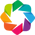

:Layout
   .Distribution.AÑO                         :Distribution   [AÑO]   (Density)
   .Distribution.EDAD                        :Distribution   [EDAD]   (Density)
   .Distribution.FOSFORO                     :Distribution   [FOSFORO]   (Density)
   .Distribution.CALCIO                      :Distribution   [CALCIO]   (Density)
   .Distribution.PRECOVID_hyphen_minus_COVID :Distribution   [estado_covid2]   (Density)

In [23]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

anual = hv.Distribution(data['AÑO'],label="AÑO").opts(color="red")
edad = hv.Distribution(data['EDAD'],label="EDAD").opts(color="green")
fosforo = hv.Distribution(data['FOSFORO'],label="FOSFORO").opts(color="yellow")
calcio = hv.Distribution(data['CALCIO'],label="CALCIO").opts(color="blue")
estado = hv.Distribution(data['estado_covid2'],label="PRECOVID-COVID").opts(color="blue")
 
(anual + edad +fosforo + calcio +  estado).opts(opts.Distribution(xlabel="Values", ylabel="Density", width=300, height=300,tools=['hover'],show_grid=True)).cols(3)

### Primera exploración de datos, revisando variables contínuas. Se encuentra en un primer análisis poca relación de la Vitamina D con la edad del paciente (unidad de análisis).

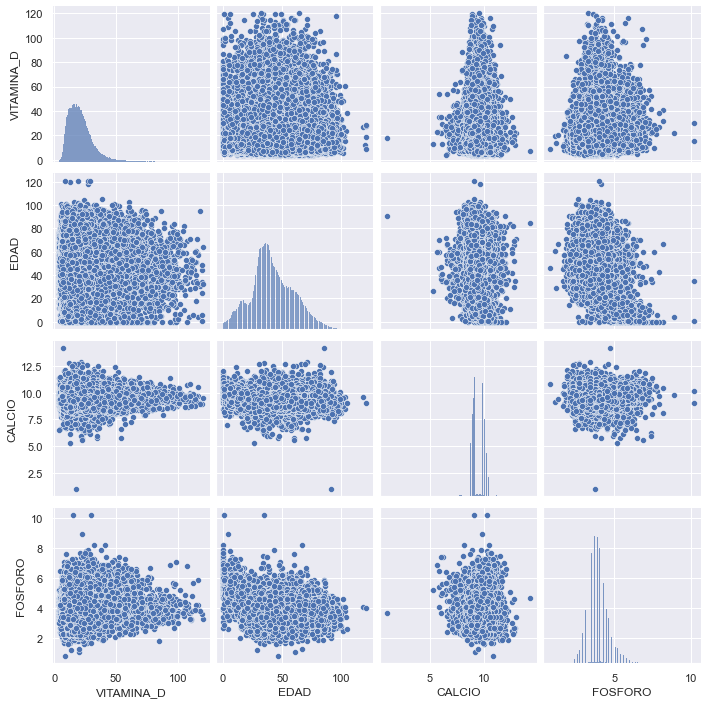

In [24]:
sns.set()
cols = ['VITAMINA_D','EDAD','CALCIO','FOSFORO']
sns.pairplot(data[cols], size = 2.5)
plt.show();

### Análisis de correlación entre las variables.

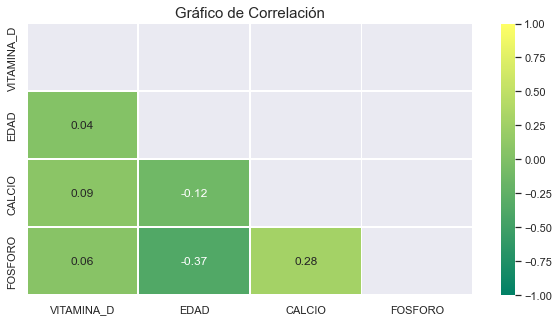

In [25]:
cols = ['VITAMINA_D', 'EDAD','CALCIO','FOSFORO']

data_selec=data[cols]
mask = np.triu(np.ones_like(data_selec.corr(), dtype=np.bool))

plt.figure(figsize = (10,5))
plt.title("Gráfico de Correlación", size=15)
sns.heatmap(data_selec.corr(),annot=True, fmt=".2f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="summer");

### Se encuentra una correlación negativa entre edad, calcio y fósforo. Esto es concecuente con la literatura que indica que a mayor edad, los niveles de calcio y fósforo bajan. Por otro lado, la Vitamina D con calcio y fósforo tienen una correlación positiva, esto es, a medida que mejora la concentración de VD en el organismo, los niveles de calcio y fósforo también aumentan.

## 4. Análisis de cada variable independiente usando Regresión Múltiple.

In [26]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

## 4.1 Estaciónes del año
### Primero se revisará cómo se comporta la concentración de Vitamina D en la población a medida que pasa de invierno a verano.

In [27]:
mod = smf.ols(formula='VITAMINA_D ~ ESTACIONES_AÑO', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4201.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:53:58   Log-Likelihood:            -7.9779e+05
No. Observations:              212462   AIC:                         1.596e+06
Df Residuals:                  212458   BIC:                         1.596e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [28]:
params = res.params
print(params)

Intercept                      18.132416
ESTACIONES_AÑO[T.OTOÑO]         3.735677
ESTACIONES_AÑO[T.PRIMAVERA]     3.152352
ESTACIONES_AÑO[T.VERANO]        7.155310
dtype: float64


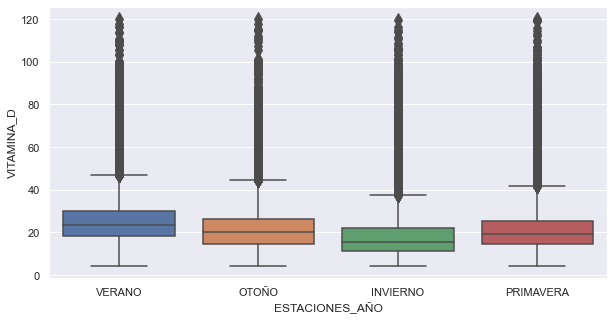

In [29]:
rcParams['figure.figsize'] = 10,5
sns.boxplot(fliersize=10, x="ESTACIONES_AÑO", y='VITAMINA_D', data=data, dodge=True)
plt.show()

### Se evidencia que al analizar la Vitamina D con respecto a las estaciones del año, en Invierno se produce la concentración más baja. Aumentando hacia el verano los resultados.

### A medida que la estación se acerca al verano la concentración de Vitamina D aumenta a nivel agregado de la población.

## 4.2 Rango edad
### Se analiza cómo se comporta la Vitamina D en adultos y niños.

In [30]:
mod2 = smf.ols(formula='VITAMINA_D ~ ADULTO_NIÑO', data=data)  
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     20.69
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           5.41e-06
Time:                        10:54:00   Log-Likelihood:            -8.0390e+05
No. Observations:              212462   AIC:                         1.608e+06
Df Residuals:                  212460   BIC:                         1.608e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              21.4513    

In [31]:
params2 = res2.params
print(params2)

Intercept              21.451330
ADULTO_NIÑO[T.Niño]     0.374445
dtype: float64


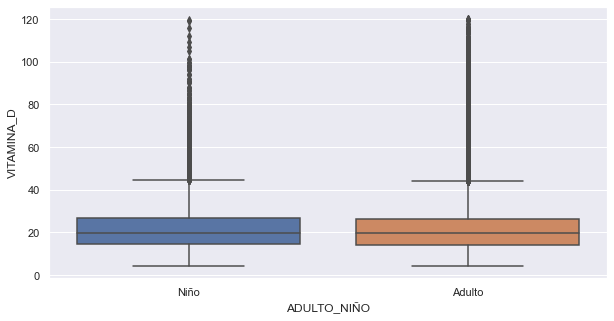

In [32]:
sns.boxplot(x="ADULTO_NIÑO", y='VITAMINA_D', data=data)
plt.show()

### Al analizar cómo se comporta la Vitamina D con respecto a si es adulto o niño arroja un R2 de 0. Esto indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a la media de rango de edad.

## 4.3 Sexo del paciente

In [33]:
mod1 = smf.ols(formula='VITAMINA_D ~ SEXO', data=data)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.028
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.311
Time:                        10:54:01   Log-Likelihood:            -8.0391e+05
No. Observations:              212462   AIC:                         1.608e+06
Df Residuals:                  212460   BIC:                         1.608e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.4982      0.027    789.230      0.0

In [34]:
params1 = res1.params
print(params1)

Intercept    21.498205
SEXO[T.M]    -0.052051
dtype: float64


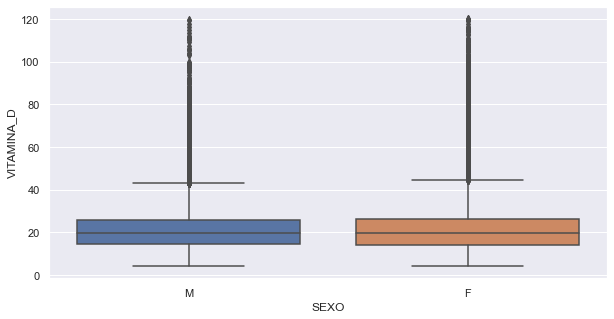

In [35]:
sns.boxplot(x="SEXO", y='VITAMINA_D', data=data)
plt.show()

### El sexo del paciente tampoco influye notablemente en los resultados de las muestras de Vitamina D.

## 4.4 Regiones desde Arica a Puerto Montt, dada por la variable Latitud.

### Comparamos el resultado con la variable Latitud que equivale al lugar físico de la región en que es tomada la Vitamina D. A mayor latitud se encuentra más cerca de la línea del Ecuador y por lo tanto las personas tienen mayor exposición de horas de sol lo que se traduce en mejores niveles de concentración de Vitamina D.

In [36]:
mod3 = smf.ols(formula='VITAMINA_D ~ latitud', data=data)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     454.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          8.83e-101
Time:                        10:54:02   Log-Likelihood:            -8.0368e+05
No. Observations:              212462   AIC:                         1.607e+06
Df Residuals:                  212460   BIC:                         1.607e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8246      0.205    126.043      0.0

In [37]:
data1= data[['LABORATORIO', 'latitud']]
data2 = data1.pivot_table('latitud', index= 'LABORATORIO', aggfunc=min, )
data2 = data2.sort_values("latitud", ascending=True)
data2.head()

latitud
LABORATORIO            
 PUERTO MONTT -42.02896
 VALDIVIA     -40.00315
 TEMUCO       -38.64815
 CONCEPCION   -37.19841
TALCA         -35.62056

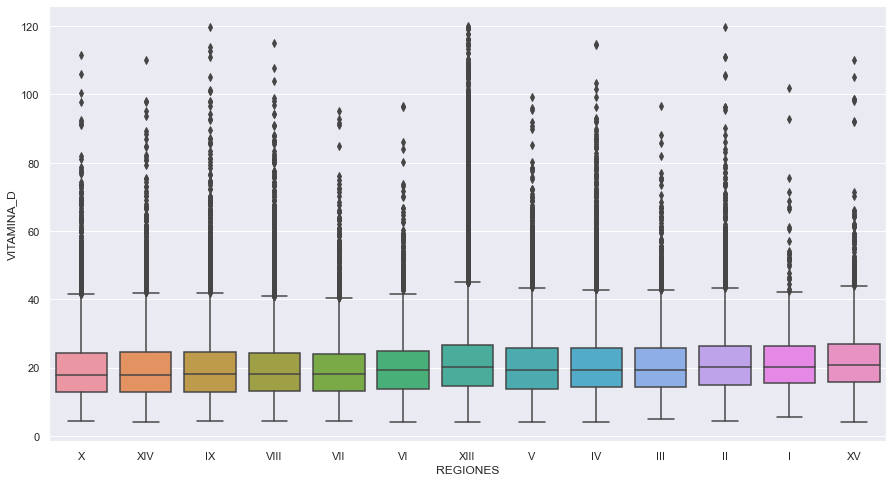

In [81]:
from matplotlib import rcParams
x__ = ['X', 'XIV', 'IX', 'VIII', 'VII', 'VI', 'XIII', 'V', 'IV', 'III', 'II', 'I', 'XV']
rcParams['figure.figsize'] = 15,8

p=sns.boxplot(x='latitud', y='VITAMINA_D', data=data)
p.set_xticklabels(x__)
p.set_xlabel("REGIONES")
plt.show()

In [39]:
params3 = res3.params
print(params3)

Intercept    25.824640
latitud       0.128623
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de LATITUD')

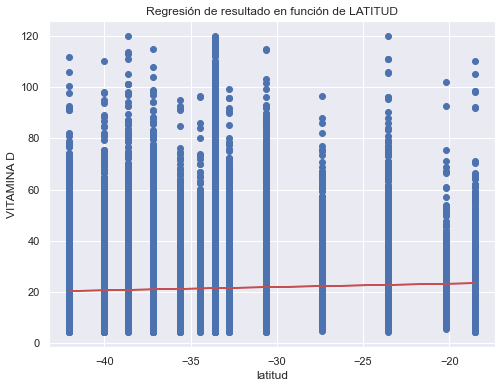

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['latitud'], data['VITAMINA_D'], "o", label="Data")
ax.plot(data['latitud'], params3['Intercept']+params3['latitud']*data['latitud']  , "r-", label="Predicted")
ax.set_ylabel("VITAMINA D")
ax.set_xlabel("latitud")
ax.set_title("Regresión de resultado en función de LATITUD")

### Revisamos como queda el modelo categorizado por Arica, que es la región más cercana a la línea del Ecuador, por lo que se espera una mayor concentración en esa zona y que va descendiendo a medida que se aleja.

## 4.5 Año en que se toma la muestra de Vitamina D (Pre Covid o durante Covid)

### Revisando cómo se comporta el resultado con respecto a los años en que fueron tomadas las muestras de Vitamina D. Se espera que la concentración de Vitamina D baje desde el 2018 al 2021, considerando que el encierro producto de la pandemia provocó mayor deficiencia de esta vitamina.

### Se espera encontrar un coeficiente de correlación negativo entre Vitamina D y estado_covid2, que representa el estado pre Covid (0) y durante Covid (1), producto de las cuarentenas realizadas en el país en período de pandemia.

In [41]:
mod4 = smf.ols(formula='VITAMINA_D ~ estado_covid2', data=data)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     928.4
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          1.78e-203
Time:                        10:54:03   Log-Likelihood:            -8.0345e+05
No. Observations:              212462   AIC:                         1.607e+06
Df Residuals:                  212460   BIC:                         1.607e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.4450      0.039    574.507

In [42]:
params4 = res4.params
print(params4)

Intercept        22.444958
estado_covid2    -1.473980
dtype: float64


Text(0.5, 1.0, 'Regresión de Vitamina D en función de estado_covid')

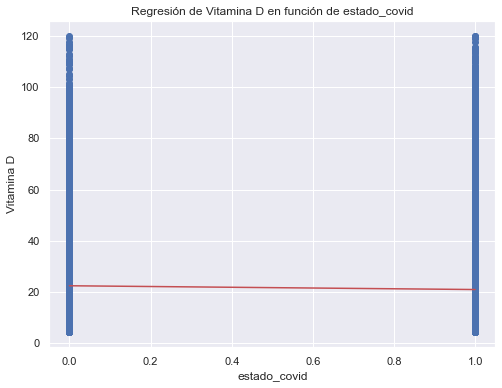

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['estado_covid2'], data['VITAMINA_D'], "o", label="data")
ax.plot(data['estado_covid2'], params4['Intercept']+params4['estado_covid2']*data['estado_covid2']  , "r-", label="Predicted")
ax.set_ylabel("Vitamina D")
ax.set_xlabel("estado_covid")
ax.set_title("Regresión de Vitamina D en función de estado_covid")

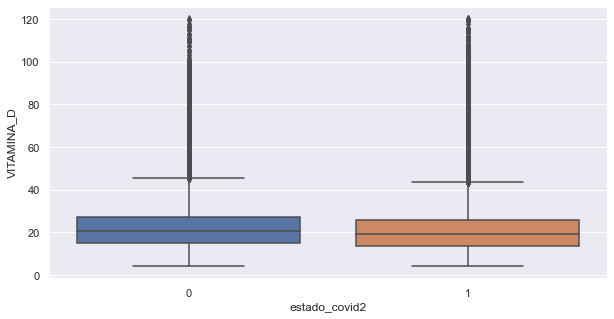

In [44]:
rcParams['figure.figsize'] = 10,5
sns.boxplot(x="estado_covid2", y='VITAMINA_D', data=data)
plt.show()

### El gráfico muestra como fue disminuyendo la concentración de Vitamina D medida en la población entre 2018 y 2021 por la baja exposición solar que hubo producto de las cuarentenas.

## 4.6 Fosforo y Calcio
### Bajos niveles de Vitamina D están a asociados a bajos niveles de Fósforo y Calcio, por este motivo se revisará el comportamiento de estas variables con respecto al resultado de Vitamina D en la población. 

In [45]:
data

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
1        02/01/2018 8:18  2018    SANTIAGO   1483181      1,13E+13    F   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
4        02/01/2018 8:33  2018   LA SERENA   1483344      1,19E+12    F   
...                  ...   ...         ...       ...           ...  ...   
212457  31/12/2021 12:20  2021    SANTIAGO   6583559      1,11E+13    F   
212458  31/12/2021 12:35  2021    SANTIAGO   6583737      1,18E+12    F   
212459  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   
212460  31/12/2021 13:17  2021    SANTIAGO   6584013      1,11E+13    F   
212461  31/12/2021 13:55  2021    SANTIAGO   6584165      1,18E+12    F   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  ...  CALCIO  CREATININA  \
0             Niño    CENTRO         VERANO    16  ...    10.9        0.90   
1           Adulto    CENTRO         VERANO    33  ...     NaN         NaN   
2           Adulto    CENTRO         VERANO    45  ...     9.6        0.80   
3           Adulto    CENTRO         VERANO    52  ...     9.6        0.60   
4           Adulto     NORTE         VERANO    52  ...     NaN        0.66   
...            ...       ...            ...   ...  ...     ...         ...   
212457      Adulto    CENTRO      PRIMAVERA    41  ...     NaN         NaN   
212458      Adulto    CENTRO      PRIMAVERA    63  ...     NaN         NaN   
212459        Niño    CENTRO      PRIMAVERA     1  ...     9.7        0.31   
212460      Adulto    CENTRO      PRIMAVERA    45  ...     NaN         NaN   
212461      Adulto    CENTRO      PRIMAVERA    64  ...     NaN        0.90   

        COVID-19  estado_covid  rango_edad estación  region_lab  \
0            NaN     Pre_covid           0        3          13   
1            NaN     Pre_covid           1        3          13   
2            NaN     Pre_covid           1        3          13   
3            NaN     Pre_covid           1        3          13   
4            NaN     Pre_covid           1        3           4   
...          ...           ...         ...      ...         ...   
212457       NaN         covid           1        2          13   
212458       NaN         covid           1        2          13   
212459       NaN         covid           0        2          13   
212460       NaN         covid           1        2          13   
212461       NaN         covid           1        2          13   

        estado_covid2   longitud   latitud  
0                   0  -70.62755 -33.60433  
1                   0  -70.62755 -33.60433  
2                   0  -70.62755 -33.60433  
3                   0  -70.62755 -33.60433  
4                   0  -70.85875 -30.61317  
...               ...        ...       ...  
212457              1  -70.62755 -33.60433  
212458              1  -70.62755 -33.60433  
212459              1  -70.62755 -33.60433  
212460              1  -70.62755 -33.60433  
212461              1  -70.62755 -33.60433  

[212462 rows x 22 columns]

In [46]:
data['FOSFORO'].isnull().value_counts()

False    128151
True      84311
Name: FOSFORO, dtype: int64

In [47]:
data['CALCIO'].isnull().value_counts()

False    131433
True      81029
Name: CALCIO, dtype: int64

### Se encuentran valores nulos en las Peticiones de muestras, esto es porque no a todos los pacientes se les solicitan estos exámenes. Se considerarán para esta revisión sólo las unidades que tienen valores en ambas muestras.

In [48]:
data1_ = data[data['FOSFORO'].notna()]

In [49]:
data1_

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
8        02/01/2018 8:37  2018    SANTIAGO   1483324      1,12E+13    F   
9        02/01/2018 8:37  2018    VALDIVIA   1483382      1,12E+13    F   
...                  ...   ...         ...       ...           ...  ...   
212452  31/12/2021 11:41  2021    SANTIAGO   6583162      1,11E+13    F   
212453  31/12/2021 11:42  2021    SANTIAGO   6583168      1,12E+13    F   
212454  31/12/2021 11:49  2021    SANTIAGO   6583212      1,12E+13    M   
212455  31/12/2021 11:56  2021    SANTIAGO   6583254      1,11E+13    F   
212459  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  ...  CALCIO  CREATININA  \
0             Niño    CENTRO         VERANO    16  ...    10.9        0.90   
2           Adulto    CENTRO         VERANO    45  ...     9.6        0.80   
3           Adulto    CENTRO         VERANO    52  ...     9.6        0.60   
8             Niño    CENTRO         VERANO     4  ...     9.9        0.40   
9           Adulto       SUR         VERANO    36  ...     9.6        0.70   
...            ...       ...            ...   ...  ...     ...         ...   
212452      Adulto    CENTRO      PRIMAVERA    40  ...     9.4         NaN   
212453      Adulto    CENTRO      PRIMAVERA    32  ...     9.0        0.67   
212454      Adulto    CENTRO      PRIMAVERA    36  ...     9.3         NaN   
212455      Adulto    CENTRO      PRIMAVERA    44  ...     9.6         NaN   
212459        Niño    CENTRO      PRIMAVERA     1  ...     9.7        0.31   

        COVID-19  estado_covid  rango_edad estación  region_lab  \
0            NaN     Pre_covid           0        3          13   
2            NaN     Pre_covid           1        3          13   
3            NaN     Pre_covid           1        3          13   
8            NaN     Pre_covid           0        3          13   
9            NaN     Pre_covid           1        3          14   
...          ...           ...         ...      ...         ...   
212452       NaN         covid           1        2          13   
212453       NaN         covid           1        2          13   
212454       NaN         covid           1        2          13   
212455       NaN         covid           1        2          13   
212459       NaN         covid           0        2          13   

        estado_covid2   longitud   latitud  
0                   0  -70.62755 -33.60433  
2                   0  -70.62755 -33.60433  
3                   0  -70.62755 -33.60433  
8                   0  -70.62755 -33.60433  
9                   0  -72.57590 -40.00315  
...               ...        ...       ...  
212452              1  -70.62755 -33.60433  
212453              1  -70.62755 -33.60433  
212454              1  -70.62755 -33.60433  
212455              1  -70.62755 -33.60433  
212459              1  -70.62755 -33.60433  

[128151 rows x 22 columns]

In [50]:
data1_['FOSFORO'].isnull().value_counts()

False    128151
Name: FOSFORO, dtype: int64

In [51]:
data1_['CALCIO'].isnull().value_counts()

False    127995
True        156
Name: CALCIO, dtype: int64

In [52]:
data2_= data1_[data1_['CALCIO'].notna()]

In [53]:
data2_['CALCIO'].isnull().value_counts()

False    127995
Name: CALCIO, dtype: int64

In [54]:
data2_

FECHA_PETICION   AÑO LABORATORIO  PETICION IDENTIFICADOR SEXO  \
0        02/01/2018 8:17  2018    SANTIAGO   1483128      1,12E+13    M   
2        02/01/2018 8:24  2018    SANTIAGO   1483186      1,11E+13    M   
3        02/01/2018 8:32  2018    SANTIAGO   1483328      1,20E+12    F   
8        02/01/2018 8:37  2018    SANTIAGO   1483324      1,12E+13    F   
9        02/01/2018 8:37  2018    VALDIVIA   1483382      1,12E+13    F   
...                  ...   ...         ...       ...           ...  ...   
212452  31/12/2021 11:41  2021    SANTIAGO   6583162      1,11E+13    F   
212453  31/12/2021 11:42  2021    SANTIAGO   6583168      1,12E+13    F   
212454  31/12/2021 11:49  2021    SANTIAGO   6583212      1,12E+13    M   
212455  31/12/2021 11:56  2021    SANTIAGO   6583254      1,11E+13    F   
212459  31/12/2021 13:01  2021    SANTIAGO   6583960      1,13E+13    M   

       ADULTO_NIÑO MACROZONA ESTACIONES_AÑO  EDAD  ...  CALCIO  CREATININA  \
0             Niño    CENTRO         VERANO    16  ...    10.9        0.90   
2           Adulto    CENTRO         VERANO    45  ...     9.6        0.80   
3           Adulto    CENTRO         VERANO    52  ...     9.6        0.60   
8             Niño    CENTRO         VERANO     4  ...     9.9        0.40   
9           Adulto       SUR         VERANO    36  ...     9.6        0.70   
...            ...       ...            ...   ...  ...     ...         ...   
212452      Adulto    CENTRO      PRIMAVERA    40  ...     9.4         NaN   
212453      Adulto    CENTRO      PRIMAVERA    32  ...     9.0        0.67   
212454      Adulto    CENTRO      PRIMAVERA    36  ...     9.3         NaN   
212455      Adulto    CENTRO      PRIMAVERA    44  ...     9.6         NaN   
212459        Niño    CENTRO      PRIMAVERA     1  ...     9.7        0.31   

        COVID-19  estado_covid  rango_edad estación  region_lab  \
0            NaN     Pre_covid           0        3          13   
2            NaN     Pre_covid           1        3          13   
3            NaN     Pre_covid           1        3          13   
8            NaN     Pre_covid           0        3          13   
9            NaN     Pre_covid           1        3          14   
...          ...           ...         ...      ...         ...   
212452       NaN         covid           1        2          13   
212453       NaN         covid           1        2          13   
212454       NaN         covid           1        2          13   
212455       NaN         covid           1        2          13   
212459       NaN         covid           0        2          13   

        estado_covid2   longitud   latitud  
0                   0  -70.62755 -33.60433  
2                   0  -70.62755 -33.60433  
3                   0  -70.62755 -33.60433  
8                   0  -70.62755 -33.60433  
9                   0  -72.57590 -40.00315  
...               ...        ...       ...  
212452              1  -70.62755 -33.60433  
212453              1  -70.62755 -33.60433  
212454              1  -70.62755 -33.60433  
212455              1  -70.62755 -33.60433  
212459              1  -70.62755 -33.60433  

[127995 rows x 22 columns]

In [55]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

In [56]:
VitD_Ca=data2_[['AÑO','VITAMINA_D','CALCIO', 'FOSFORO']]
VitD_Ca=VitD_Ca.groupby(['AÑO']).agg({'VITAMINA_D':'mean','CALCIO':'mean','FOSFORO':'mean'})
VitD_Ca=VitD_Ca.reset_index()
VitD_Ca

AÑO  VITAMINA_D    CALCIO   FOSFORO
0  2018   20.658693  9.632457  4.050916
1  2019   23.305181  9.667543  4.050511
2  2020   21.734958  9.322619  3.876957
3  2021   20.077953  9.289798  3.813240

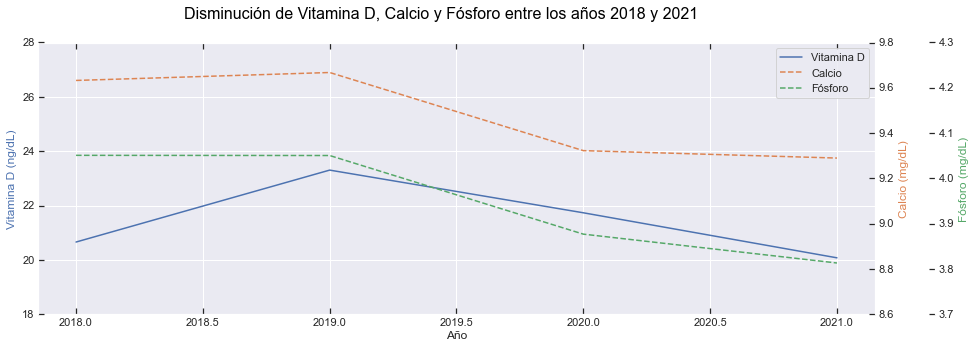

In [57]:
plt.figure(figsize=(15, 5))
sns.set_theme()
host = host_subplot(111, axes_class=AA.Axes)
#host = fig.add_axes([0.15, 0.1, 0.65, 0.8], axes_class=HostAxes)
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.axis["right2"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

p1, = host.plot(VitD_Ca.AÑO, VitD_Ca.VITAMINA_D,label="Vitamina D")

p2, = par1.plot(VitD_Ca.AÑO, VitD_Ca.CALCIO, linestyle="--",label="Calcio")
p3, = par2.plot(VitD_Ca.AÑO, VitD_Ca.FOSFORO, linestyle="--", label="Fósforo")


#par1.set_xlim(2018, 2021)
par1.set_ylim(8.6, 9.8)
par2.set_ylim(3.7, 4.3)
host.set_ylim(18, 28)

host.set_xlabel("Año")
host.set_ylabel("Vitamina D (ng/dL)")
par1.set_ylabel("Calcio (mg/dL)")
par2.set_ylabel("Fósforo (mg/dL)")
plt.suptitle("Disminución de Vitamina D, Calcio y Fósforo entre los años 2018 y 2021 ",
             horizontalalignment = 'center', fontsize=16, color ='black')
host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.show()

### El gráfico muestra la disminución que tuvo la Vitamina D durante los años 2020 y 2021 producto probablemente por las cuarentenas realizadas en pandemia. El 2018 es un año atípico, en donde se realizaron pocos exámenes de Vitamina D y muy probablemente fueron solicitados por personas ya con sospecha de baja concentración de este indicador. Esta Vitamina cobró importancia luego de empezada la pandemia, el laboratorio Bionet aumentó la cantidad de exámenes solicitados por esta Vitamina de 28.000 el 2018 a 90.000 el año 2021, en donde la información de los beneficios de manetener un buen nivel fue especialmente importante y más reconocido por la OMS y diversas instituciones científicas.

### 4.7 Fósforo

In [58]:
mod5 = smf.ols(formula='VITAMINA_D ~ FOSFORO', data=data2_)
res5 = mod5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     512.2
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          3.53e-113
Time:                        10:54:06   Log-Likelihood:            -4.7764e+05
No. Observations:              127995   AIC:                         9.553e+05
Df Residuals:                  127993   BIC:                         9.553e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3976      0.171    101.632      0.0

In [59]:
params5 = res5.params
print(params5)

Intercept    17.397575
FOSFORO       0.977465
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de FOSFORO')

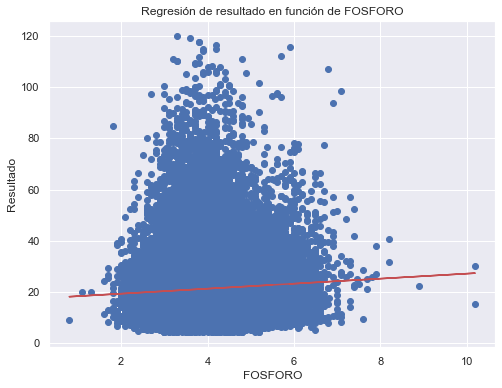

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data2_['FOSFORO'], data2_['VITAMINA_D'], "o", label="data2")
ax.plot(data2_['FOSFORO'], params5['Intercept']+params5['FOSFORO']*data2_['FOSFORO']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("FOSFORO")
ax.set_title("Regresión de resultado en función de FOSFORO")

### El resultado más bajo de Vitamina D, definido como "insuficiente", está dado por 0. El resultado de la Vitamina D está correlacionado positivamente con los resultados de Fosforo en la muestra poblacional. Esto es, valores bajos de Vitamina D, están asociados también a baja concentración de Fósforo en el organismo.

### 4.8 Calcio

In [61]:
mod6 = smf.ols(formula='VITAMINA_D ~ CALCIO', data=data2_)
res6 = mod6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1075.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          7.29e-235
Time:                        10:54:07   Log-Likelihood:            -4.7736e+05
No. Observations:              127995   AIC:                         9.547e+05
Df Residuals:                  127993   BIC:                         9.547e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2514      0.518      8.204      0.0

In [62]:
params6 = res6.params
print(params6)

Intercept    4.251426
CALCIO       1.800835
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de CALCIO')

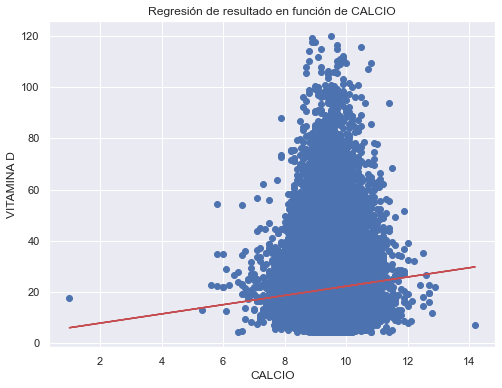

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data2_['CALCIO'], data2_['VITAMINA_D'], "o", label="data2")
ax.plot(data2_['CALCIO'], params6['Intercept']+params6['CALCIO']*data2_['CALCIO']  , "r-", label="Predicted")
ax.set_ylabel("VITAMINA D")
ax.set_xlabel("CALCIO")
ax.set_title("Regresión de resultado en función de CALCIO")

## 5.  Implementación del Modelos de Regresión Lineal Múltiple

### Se seleccionaron para este análisis las variables cuyo R^2 > 0

In [64]:
mod6 = smf.ols(formula='VITAMINA_D ~ CALCIO + FOSFORO + estación + latitud + estado_covid2', data=data2_)
res6 = mod6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:             VITAMINA_D   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1868.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:54:08   Log-Likelihood:            -4.7338e+05
No. Observations:              127995   AIC:                         9.468e+05
Df Residuals:                  127989   BIC:                         9.468e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.9350      0.627     12.653

#### El análisis de la regresión múltiple muestra que el R cuadrado fue aumentando a medida que agregamos más variables al modelo, explicando con un R2 cuadrado cercano al 6.8% . El modelo sigue siendo valido al tener un F Prob menor al p value (<0.05), rechazándose la hipotesis nula que dice que no hay relación lineal si todos los beta son igales a cero. Las variables predictoras utilizadas presentaron un P menor a 0.05 lo que las hace válidas para ser utilizadas en el modelo. Los Coeficientes de cada variable asi como el intercepto se utilizarán en la fórmula de la regresión multiple, lo que finalmente nos permitirá predecir las concentraciones de Vitamina D.



In [65]:
from sklearn import datasets, linear_model

In [66]:
data_reg_multiple= data2_[['CALCIO', 'FOSFORO', 'estación', 'latitud', 'estado_covid2','VITAMINA_D']]
data_reg_multiple.head(5)

CALCIO  FOSFORO  estación   latitud  estado_covid2  VITAMINA_D
0    10.9      5.5         3 -33.60433              0       22.87
2     9.6      4.1         3 -33.60433              0       17.17
3     9.6      4.3         3 -33.60433              0       14.44
8     9.9      3.9         3 -33.60433              0       35.19
9     9.6      5.0         3 -40.00315              0       14.04

In [67]:
#Seleccionamos las columnas Calcio Fósforo, estación, latitud y estado del covid (preo o covid) del dataset

X_multiple = data_reg_multiple.iloc[:, :-1].values

#Definición de la variable target (Vitamina D)
y_multiple = data_reg_multiple.iloc[:, -1].values

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separamos los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state = 0)

#Define el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realiza una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()

print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)

print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

print('Coeficiente de determinación (R^2):')
print(lr_multiple.score(X_train, y_train))


DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 1.25589303  0.63114402  2.12898112  0.08882343 -1.13061358]
Valor de la intersección o coeficiente "b":
7.482700947931161
Coeficiente de determinación (R^2):
0.06870406261005224


In [84]:
# R2 ajustado

r_squared = r2_score(y_test,Y_pred_multiple)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)
print('Adjusted R^Score : .%3f' %adjusted_r_squared)

Adjusted R^Score : .0.065213


## 5.1 Comparación de los valores de testeto con los valores de la predicción del modelo

### En el siguiente gráfico se compara el testeo y prediccción para un tamaño muestral igual a 100

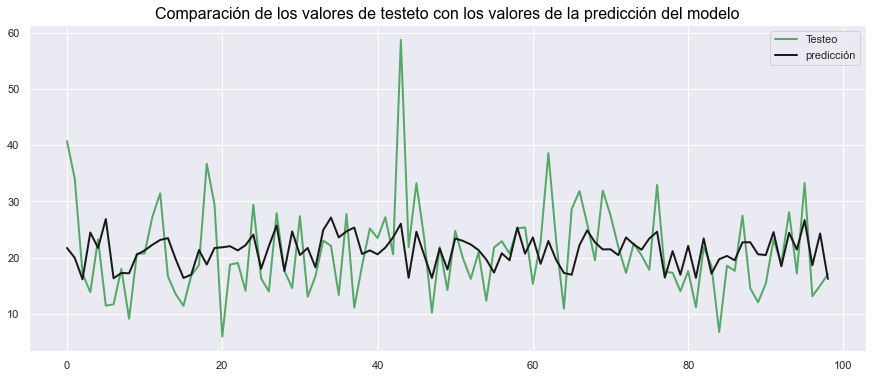

In [69]:
plt.figure(figsize=(15, 6))

plt.plot(list(y_test[0:99]),  c="g", label="Testeo", linewidth=2)
plt.plot(Y_pred_multiple[0:99], c="k", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.title("Comparación de los valores de testeto con los valores de la predicción del modelo",fontsize=16,color ='black')
plt.show();

## 5.2 Fórmula de regresión múltiple


$$ y=\beta_0+\beta_1 x_1+\beta_2 x_2+\cdots+\beta_p x_p $$

### 5.2.1 Probando la predición del modelo..

In [70]:
def VITAMINA_D(CALCIO, FOSFORO, estación, latitud, estado_covid2):
    
    VITAMINAD= (CALCIO * lr_multiple.coef_[0]+ FOSFORO*lr_multiple.coef_[1] + estación*lr_multiple.coef_[2] 
                + latitud*lr_multiple.coef_[3]+ estado_covid2*lr_multiple.coef_[4] +lr_multiple.intercept_ )
  
    return(VITAMINAD)

In [71]:
vit = VITAMINA_D(8,4,3,-33.60433,1)

print(f" El resultado de Vitamina D es: {round((vit),2)} ng/dL")


 El resultado de Vitamina D es: 22.33 ng/dL


In [72]:
vit2 =pd.DataFrame({"CALCIO":[9.4],"FOSFORO":[3.2],"estación":[0],"latitud":[-42.02896],"estado_covid2":[0]})
lr_multiple.predict(vit2)

array([17.57460009])

### Encontramos que para los valores asignados de las variables predictores del ejemplo "vit", arroja un resultado de VItamina D de 22.33 ng/dL

## 6. Comportamiento de las variables predictoras con otros modelos

### 6.1 Random Forest

In [73]:
# Cargamos la libreria 
from sklearn.ensemble import RandomForestRegressor
#cargamos la función 
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)#500 árboles

#Entrenamos el modelo
regressor = rf_reg.fit(X_train, y_train)

#Hacemos las predicciones
y_pred_rf = regressor.predict(X_test)

### En el siguiente gráfico se muestra la cantidad de muestras testeadas con respecto a la predicción de VD

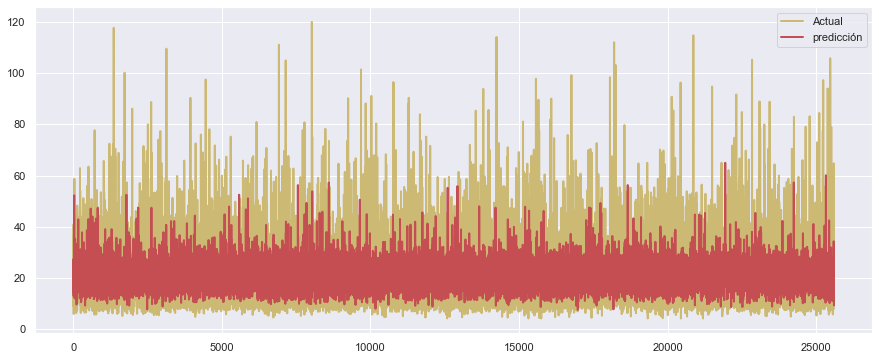

In [74]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_rf, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### 6.2. Arbol de decisión de regresión

### En el siguiente gráfico se muestra la cantidad de muestras testeadas con respecto a la predicción de VD usando arbol de decisión

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 2).fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

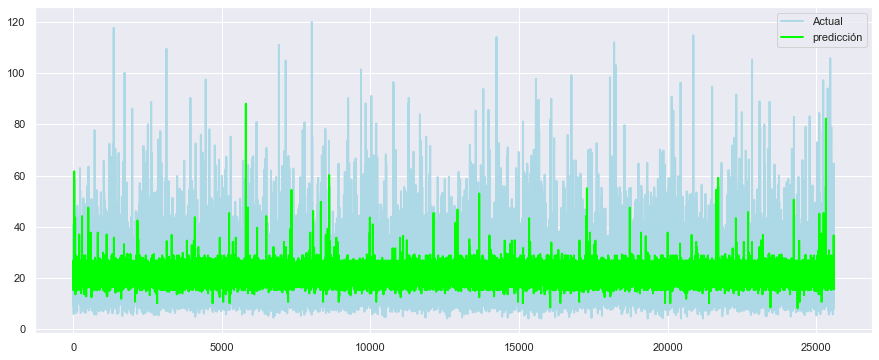

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_dtr, c="lime", label="predicción", linewidth=2)

plt.legend(loc='best')
plt.show();

### 6.3 Modelo SVR

### En el siguiente gráfico se muestra la cantidad de muestras testeadas con respecto a la predicción de VD usando SVR

In [77]:
from sklearn import svm
svm_reg = svm.SVR()

# Entrenando nuestro modelo
regressor = svm_reg.fit(X_train, y_train)

# Haciendo la predicciones
y_pred_svr = regressor.predict(X_test)

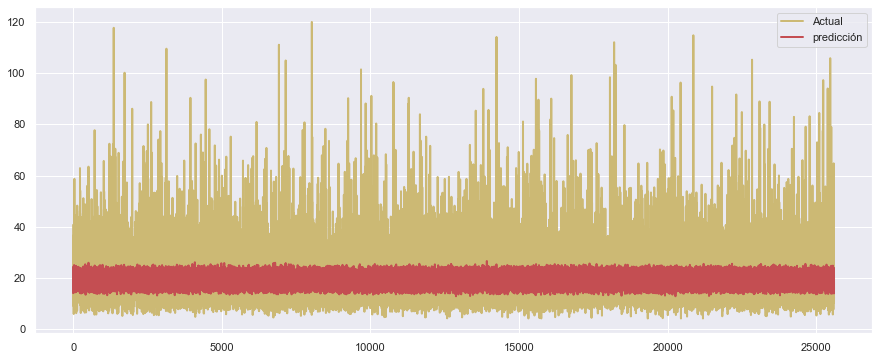

In [78]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_svr, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## 7. Comparación de las métricas de los distintos modelos analizados.

In [86]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test,Y_pred_multiple) 
adjusted_r_squared = 1 - (1-r_squared)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)

print('Adjusted R^Score : .%3f' %adjusted_r_squared)

modelos = pd.DataFrame({
    'Model': ["Regresión Lineal múltiple","Random Forest", "SVR", "Arbol Decisión"] ,
     "R2":[r2_score(y_test, Y_pred_multiple)*100,r2_score(y_test, y_pred_rf)*100, r2_score(y_test, y_pred_svr)*100, r2_score(y_test, y_pred_dtr)*100],
     "RMSE": [np.sqrt(mean_squared_error(y_test, Y_pred_multiple)) ,np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_svr)),
              np.sqrt(mean_squared_error(y_test, y_pred_dtr))]})
modelos

Adjusted R^Score : .0.065213


Model        R2       RMSE
0  Regresión Lineal múltiple  6.524934   9.895613
1              Random Forest -2.107243  10.342442
2                        SVR  3.189937  10.070594
3             Arbol Decisión  6.050034   9.920719

## 8. Conclusiones

### De las variables analizadas, se pudo verificar que existe correlación con los resultados de la Vitamina D en las variables: Estación del año, Laboratorio (región del país), Año en que se toma la muestra (pre o durante pandemia), Fósforo y Calcio.
### En cuanto los modelos revisados, el mejor para predecir la concentración de Vitamina D, con las variables que se contaban, es el modelo de Regresión Lineal Múltiple, por tener un R^2 mayor y un RMSE menor a los otros modelos.
### A futuro se podría complementar este estudio con variables como la duración media del sol en el día por latitud, más otros indicadores del paciente como raza, indice de masa corporal (obesidad), consumo de alcohol, sedentarismo, entre otros factores que se han considerado de significancia clínica sobre esta Vitamina.